# Predicting attacks : UNSW-NB 15 dataset

## Objective of this lab session

The objective of this lab session is twofold:
* Deploy data analysis for the analysis of cybersecurity data
* Perform anomaly detection using XGBoost and Linear Regression algorithms and evaluate its learning profile.

## Dataset

The dataset used for this analysis is the UNSW-NB 15 dataset of Australian Centre for Cyber
Security (ACCS). It was first published in 2015.

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

## 1. Loading Data

In [2]:
training_set = pd.read_csv("UNSW_NB15_genn(1).csv")
training_set.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


## 2. Dataset Observation

In [3]:
training_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96000 entries, 0 to 95999
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 96000 non-null  int64  
 1   dur                96000 non-null  float64
 2   proto              96000 non-null  object 
 3   service            96000 non-null  object 
 4   state              96000 non-null  object 
 5   spkts              96000 non-null  int64  
 6   dpkts              96000 non-null  int64  
 7   sbytes             96000 non-null  int64  
 8   dbytes             96000 non-null  int64  
 9   rate               96000 non-null  float64
 10  sttl               96000 non-null  int64  
 11  dttl               96000 non-null  int64  
 12  sload              96000 non-null  float64
 13  dload              96000 non-null  float64
 14  sloss              96000 non-null  int64  
 15  dloss              96000 non-null  int64  
 16  sinpkt             960

In [4]:
training_set.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


### Categorical variables

In [5]:
mask = (training_set.dtypes == np.object)
print(training_set.loc[:,mask].head())
list_cat = training_set.loc[:,mask].columns.tolist()
print(list_cat)
print(training_set.loc[:,mask].values)

  proto service state attack_cat
0   tcp       -   FIN     Normal
1   tcp       -   FIN     Normal
2   tcp       -   FIN     Normal
3   tcp     ftp   FIN     Normal
4   tcp       -   FIN     Normal
['proto', 'service', 'state', 'attack_cat']
[['tcp' '-' 'FIN' 'Normal']
 ['tcp' '-' 'FIN' 'Normal']
 ['tcp' '-' 'FIN' 'Normal']
 ...
 ['udp' 'dns' 'INT' 'Generic']
 ['udp' 'dns' 'INT' 'Generic']
 ['udp' 'dns' 'INT' 'Generic']]


C:\Users\USER\AppData\Local\Temp\ipykernel_17268\659316845.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = (training_set.dtypes == np.object)


### Numeric variables

In [6]:
mask = (training_set.dtypes != np.object)
print(training_set.loc[:,mask].head())
list_cat = training_set.loc[:,mask].columns.tolist()
print(list_cat)
training_set.loc[:,mask].describe()

C:\Users\USER\AppData\Local\Temp\ipykernel_17268\4132029317.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = (training_set.dtypes != np.object)


   id       dur  spkts  dpkts  sbytes  dbytes       rate  sttl  dttl  \
0   1  0.121478      6      4     258     172  74.087490   252   254   
1   2  0.649902     14     38     734   42014  78.473372    62   252   
2   3  1.623129      8     16     364   13186  14.170161    62   252   
3   4  1.681642     12     12     628     770  13.677108    62   252   
4   5  0.449454     10      6     534     268  33.373826   254   252   

          sload  ...  ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  \
0  14158.942380  ...                 1                 1               1   
1   8395.112305  ...                 1                 1               2   
2   1572.271851  ...                 1                 1               3   
3   2740.178955  ...                 1                 1               3   
4   8561.499023  ...                 2                 1              40   

   is_ftp_login  ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  \
0             0           0          

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,96000.000000,96000.000000,96000.000000,96000.000000,9.600000e+04,9.600000e+04,9.600000e+04,96000.000000,96000.000000,9.600000e+04,...,96000.000000,96000.000000,96000.000000,96000.000000,96000.000000,96000.000000,96000.000000,96000.000000,96000.000000,96000.000000
mean,81654.176344,0.618848,18.953542,22.589927,2.560011e+03,1.856160e+04,9.838167e+04,149.379552,38.778260,5.569087e+07,...,8.410385,6.415750,12.866854,0.009906,0.009906,0.071542,9.879510,13.806688,0.028771,0.416667
std,61301.079062,3.851428,47.841367,87.225198,1.879004e+04,1.140188e+05,1.666718e+05,111.634043,74.832244,1.393387e+08,...,9.803543,7.013113,12.867052,0.099247,0.099247,0.388222,9.322804,12.287758,0.167163,0.493009
min,1.000000,0.000000,1.000000,0.000000,2.800000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,24000.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.625517e+02,31.000000,0.000000,1.377357e+05,...,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,2.000000,3.000000,0.000000,0.000000
50%,62908.500000,0.001028,2.000000,2.000000,1.460000e+02,1.620000e+02,4.777343e+03,254.000000,29.000000,1.818356e+06,...,2.000000,1.000000,5.000000,0.000000,0.000000,0.000000,6.000000,9.000000,0.000000,0.000000
75%,143980.500000,0.093852,14.000000,18.000000,1.664500e+03,1.862000e+03,1.250000e+05,254.000000,29.000000,5.700000e+07,...,16.000000,15.000000,24.000000,0.000000,0.000000,0.000000,16.000000,24.000000,0.000000,1.000000
max,175341.000000,59.999989,2722.000000,6494.000000,3.592470e+06,8.645430e+06,1.000000e+06,255.000000,254.000000,5.600000e+09,...,51.000000,46.000000,63.000000,2.000000,2.000000,12.000000,51.000000,62.000000,1.000000,1.000000


### Evaluation of the training dataset

In [7]:
#  Check whether the positive label (1) match attack categories, and whether attack categories match labelled data.

# all(iterable) returns True if all elements of the iterable are considered as true values
print(all(((training_set.label == 1) & (training_set.attack_cat != 'Normal')) == (training_set.attack_cat != 'Normal')))
print(all(((training_set.attack_cat != 'Normal') & (training_set.label == 1)) == (training_set.label == 1)))

True
True


In [8]:
# number of occurrences for each attack category
training_set.attack_cat.value_counts()

Normal     56000
Generic    40000
Name: attack_cat, dtype: int64

#### Which protocols and services appear in the positively labelled entries? 

In [9]:
mask = (training_set.label == 1)
print(training_set.loc[mask,:].service.value_counts())
print(training_set.loc[mask,:].proto.value_counts())

dns       39116
-           504
http        289
smtp         60
ssl          13
dhcp          9
radius        3
ftp           3
ssh           1
pop3          1
snmp          1
Name: service, dtype: int64
udp       39229
tcp         486
unas        104
ospf         38
sctp         15
          ...  
cphb          1
i-nlsp        1
mhrp          1
idpr          1
srp           1
Name: proto, Length: 122, dtype: int64


#### In the negatively labelled ones?

In [10]:
mask = (training_set.label == 0)
print(training_set.loc[mask,:].service.value_counts())
print(training_set.loc[mask,:].proto.value_counts())

-           36512
dns          7493
http         5348
ftp-data     2552
smtp         1579
ssh          1291
ftp          1218
pop3            4
radius          2
snmp            1
Name: service, dtype: int64
tcp     39121
udp     13922
arp      2859
ospf       64
igmp       18
icmp       15
rtp         1
Name: proto, dtype: int64


## Data cleaning

In [11]:
Y = training_set.label
X = training_set.drop(columns=['id','attack_cat','label'])
mask = (X.dtypes == np.object)
list_cat = X.loc[:,mask].columns.tolist()
list_cat

C:\Users\USER\AppData\Local\Temp\ipykernel_17268\3926415827.py:3: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = (X.dtypes == np.object)


['proto', 'service', 'state']

In [12]:
X = pd.get_dummies(X, columns=list_cat)
X.head()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_ssl,state_CON,state_ECO,state_FIN,state_INT,state_PAR,state_REQ,state_RST,state_URN,state_no
0,0.121478,6,4,258,172,74.087490,252,254,14158.942380,8495.365234,...,0,0,0,1,0,0,0,0,0,0
1,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,503571.312500,...,0,0,0,1,0,0,0,0,0,0
2,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,60929.230470,...,0,0,0,1,0,0,0,0,0,0
3,1.681642,12,12,628,770,13.677108,62,252,2740.178955,3358.622070,...,0,0,0,1,0,0,0,0,0,0
4,0.449454,10,6,534,268,33.373826,254,252,8561.499023,3987.059814,...,0,0,0,1,0,0,0,0,0,0


In [13]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: label, dtype: int64

## Machine Learning Analysis

In [14]:
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [19]:
import xgboost as xgb
from sklearn.metrics import classification_report,roc_auc_score,average_precision_score

In [20]:
params = {
    'max_depth': 10,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 2,                # Number of classes 
    'n_gpus': 4
}

xg_clf = xgb.XGBClassifier(**params)
xg_clf.fit(X_train, y_train)

C:\Users\USER\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [01:19:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_gpus" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_gpus=4, n_jobs=None,
              num_class=2, ...)

In [21]:
pred = xg_clf.fit(X_train, y_train).predict(X_test)
print(classification_report(y_test, pred))

C:\Users\USER\anaconda3\lib\site-packages\xgboost\core.py:160: UserWarning: [01:20:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_gpus" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11230
           1       1.00      1.00      1.00      7970

    accuracy                           1.00     19200
   macro avg       1.00      1.00      1.00     19200
weighted avg       1.00      1.00      1.00     19200



### AUROC Score

In [22]:
roc_auc_score(y_test, pred)

0.9976281827109899

### AUPRC Score

In [23]:
print('AUPRC = {}'.format(average_precision_score(y_test,pred)))

AUPRC = 0.9964201183452379


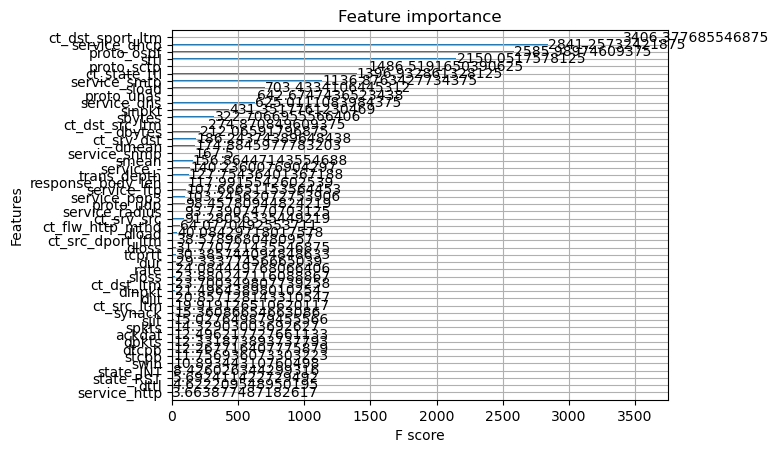

In [24]:
## PLOT IMPORTANCE OF FEATURES with type cover
# ”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
xgb.plot_importance(xg_clf, importance_type='cover')
plt.rcParams['figure.figsize'] = [10, 20]
plt.show()

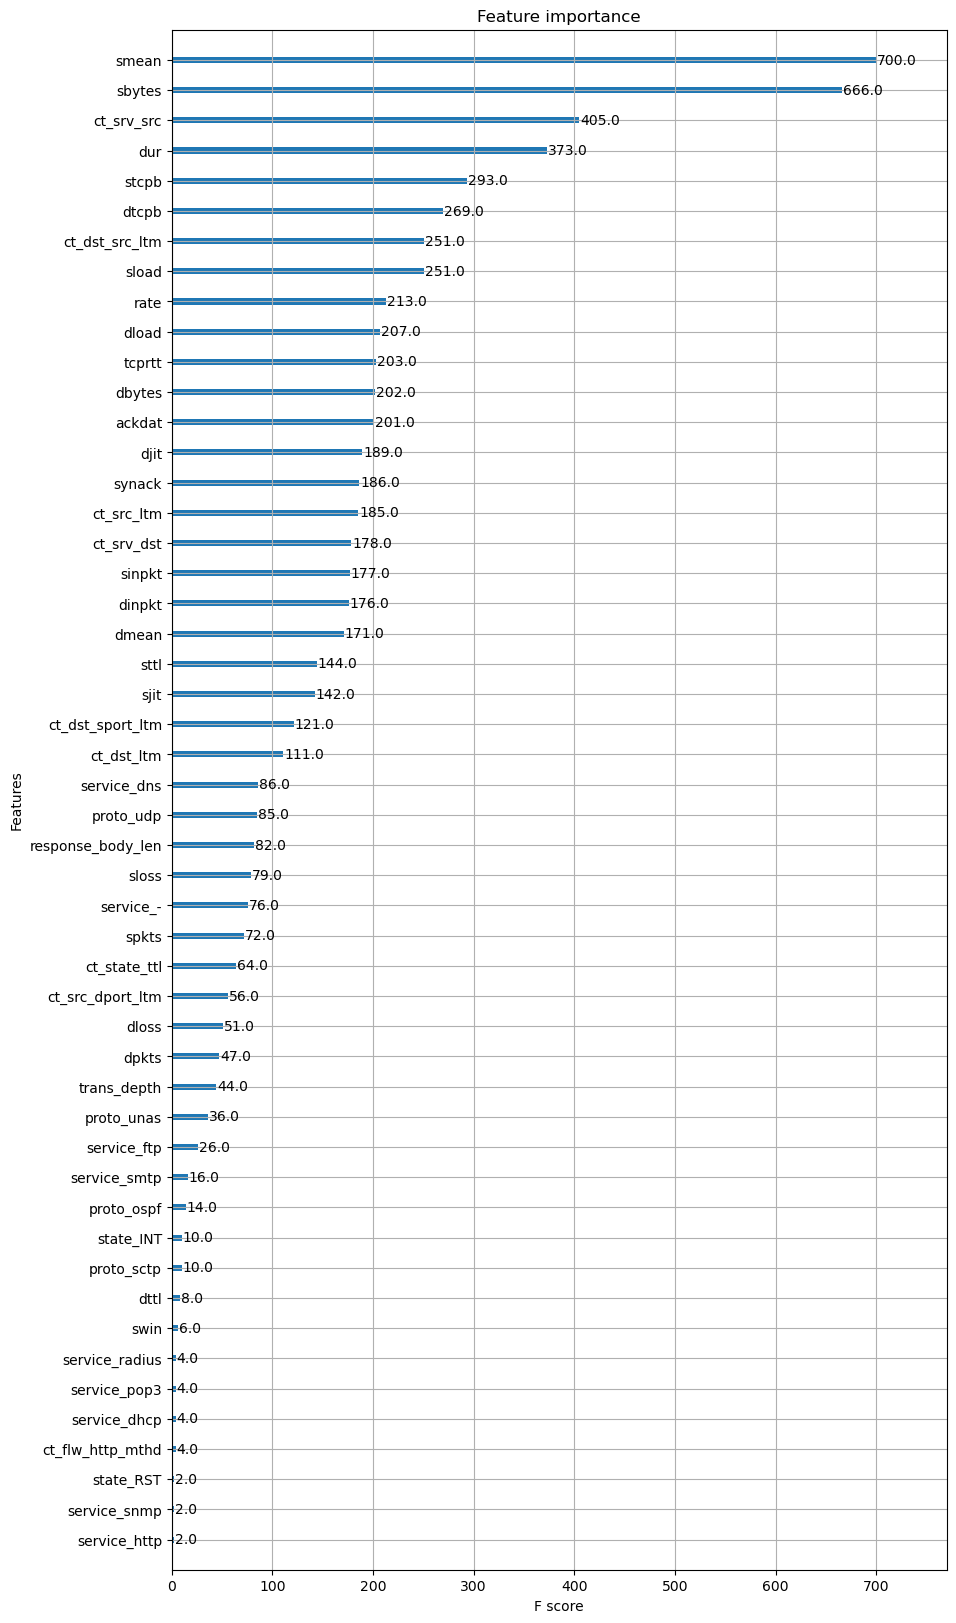

In [25]:
## PLOT IMPORTANCE OF FEATURES with type weight
# ”weight” is the number of times a feature appears in a tree
xgb.plot_importance(xg_clf, importance_type='weight')
plt.show()

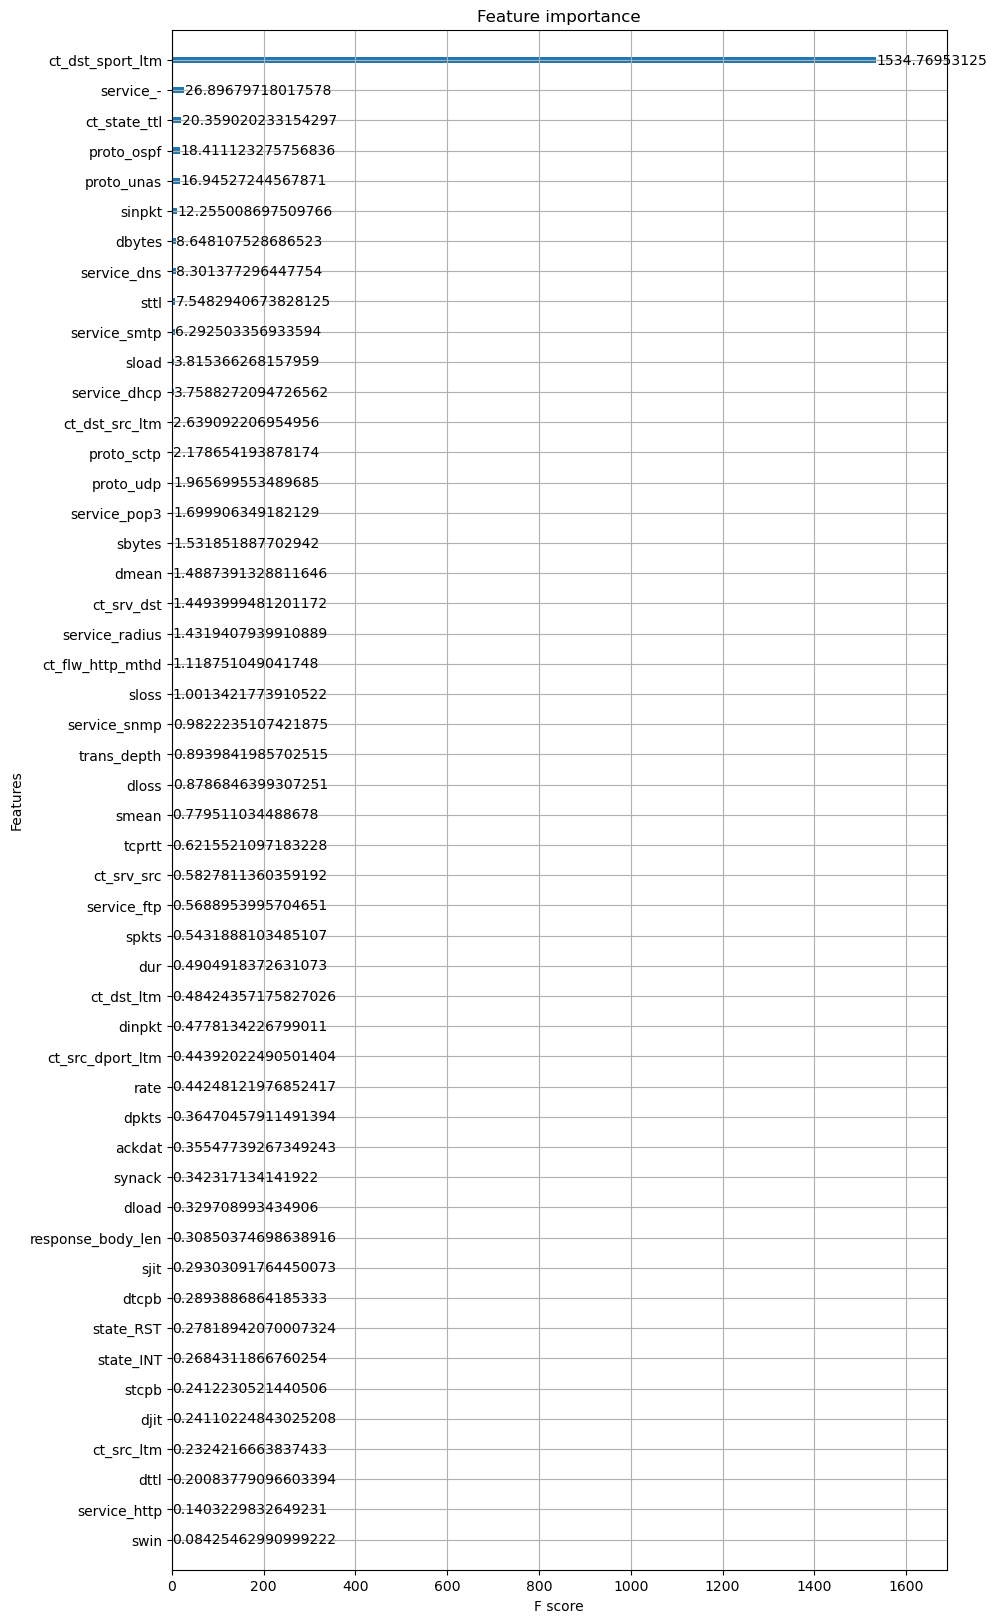

In [26]:
## PLOT IMPORTANCE OF FEATURES with type gain
# ”gain” is the average gain of splits which use the feature
xgb.plot_importance(xg_clf, importance_type='gain')
plt.show()

## Statistics Analysis

Let's apply a Principal Component Analysis (PCA) to the dataset X, to extract independent parameters
of the model

In [30]:
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# Assuming you have your data in X and labels in y
# Split the data into training and testing sets
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#



In [31]:
 #Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
# Create an SVM model with a linear kernel
svm_model = svm.SVC(kernel='linear')

# Fit the model to the training data
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = svm_model.predict(X_test_scaled)


In [33]:
# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC AUC and Average Precision scores
roc_auc = roc_auc_score(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

print(f"ROC AUC Score: {roc_auc}")
print(f"Average Precision Score: {average_precision}")


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11230
           1       1.00      0.99      0.99      7970

    accuracy                           0.99     19200
   macro avg       0.99      0.99      0.99     19200
weighted avg       0.99      0.99      0.99     19200

ROC AUC Score: 0.9928866151004826
Average Precision Score: 0.9910196280385797


In [35]:
#********POLYNOMIAL_KERNEL*********
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score



# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model with a polynomial kernel
svm_model_poly = svm.SVC(kernel='poly', degree=3)  # You can adjust the degree as needed

# Fit the model to the training data
svm_model_poly.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_poly = svm_model_poly.predict(X_test_scaled)

# Evaluate the model
print("Classification Report (Polynomial Kernel):")
print(classification_report(y_test, y_pred_poly))

# Calculate ROC AUC and Average Precision scores
roc_auc_poly = roc_auc_score(y_test, y_pred_poly)
average_precision_poly = average_precision_score(y_test, y_pred_poly)

print(f"ROC AUC Score (Polynomial Kernel): {roc_auc_poly}")
print(f"Average Precision Score (Polynomial Kernel): {average_precision_poly}")


Classification Report (Polynomial Kernel):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11230
           1       1.00      0.99      0.99      7970

    accuracy                           0.99     19200
   macro avg       0.99      0.99      0.99     19200
weighted avg       0.99      0.99      0.99     19200

ROC AUC Score (Polynomial Kernel): 0.9923766327646751
Average Precision Score (Polynomial Kernel): 0.9902038984303908


In [36]:
#******************************SIGMOID_KERNEL**************
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score



# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model with a sigmoid kernel
svm_model_sigmoid = svm.SVC(kernel='sigmoid')

# Fit the model to the training data
svm_model_sigmoid.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_sigmoid = svm_model_sigmoid.predict(X_test_scaled)

# Evaluate the model
print("Classification Report (Sigmoid Kernel):")
print(classification_report(y_test, y_pred_sigmoid))

# Calculate ROC AUC and Average Precision scores
roc_auc_sigmoid = roc_auc_score(y_test, y_pred_sigmoid)
average_precision_sigmoid = average_precision_score(y_test, y_pred_sigmoid)

print(f"ROC AUC Score (Sigmoid Kernel): {roc_auc_sigmoid}")
print(f"Average Precision Score (Sigmoid Kernel): {average_precision_sigmoid}")


Classification Report (Sigmoid Kernel):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11230
           1       0.99      0.98      0.99      7970

    accuracy                           0.99     19200
   macro avg       0.99      0.99      0.99     19200
weighted avg       0.99      0.99      0.99     19200

ROC AUC Score (Sigmoid Kernel): 0.9890212182594793
Average Precision Score (Sigmoid Kernel): 0.9826681513835529


In [38]:
#********RBF_KERNEL*********************

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, average_precision_score

# Assuming you have your data in X and labels in y
# Split the data into training and testing sets

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model with an RBF kernel
svm_model_rbf = svm.SVC(kernel='rbf')

# Fit the model to the training data
svm_model_rbf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred_rbf = svm_model_rbf.predict(X_test_scaled)

# Evaluate the model
print("Classification Report (RBF Kernel):")
print(classification_report(y_test, y_pred_rbf))

# Calculate ROC AUC and Average Precision scores
roc_auc_rbf = roc_auc_score(y_test, y_pred_rbf)
average_precision_rbf = average_precision_score(y_test, y_pred_rbf)

print(f"ROC AUC Score (RBF Kernel): {roc_auc_rbf}")
print(f"Average Precision Score (RBF Kernel): {average_precision_rbf}")


Classification Report (RBF Kernel):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11230
           1       1.00      0.99      0.99      7970

    accuracy                           0.99     19200
   macro avg       0.99      0.99      0.99     19200
weighted avg       0.99      0.99      0.99     19200

ROC AUC Score (RBF Kernel): 0.9929129270382813
Average Precision Score (RBF Kernel): 0.9911966721413523
